# Definitions

In [2]:
# import
from astropy.io import ascii
from matplotlib import pyplot as plt
import numpy as np

In [3]:
# read data
def readData(dataFile):
    
    data = ascii.read(dataFile)
    
    return data

In [25]:
# plot data
def plotData(x, y1, y2, y3, y4, yerr1, yerr2, yerr3, yerr4):
    
    # plot all 4 curves
    plt.errorbar(x, y1, yerr=yerr1, fmt='C0o')
    plt.errorbar(x, y2, yerr=yerr2, fmt='C1o')
    plt.errorbar(x, y3, yerr=yerr3, fmt='C2o')
    plt.errorbar(x, y4, yerr=yerr4, fmt='C3o')
    plt.xlabel('day')
    plt.ylabel('flux')
    plt.title('Adjusted Flux v. Time')

In [5]:
# normalize data
def normalize(y1, y2, y3, y4, yerr1, yerr2, yerr3, yerr4, normalConstants):
    # normalization constant can be set or left empty to run self averages
    
    if normalConstants.size == 0:
        # divide each point by average
        n1 = y1/np.mean(y1)
        n2 = y2/np.mean(y2)
        n3 = y3/np.mean(y3)
        n4 = y4/np.mean(y4)

        # do same with error
        nerr1 = yerr1/np.mean(y1)
        nerr2 = yerr2/np.mean(y2)
        nerr3 = yerr3/np.mean(y3)
        nerr4 = yerr4/np.mean(y4)
        
    else:
        # divide each point by normalConstant
        n1 = y1/normalConstants[0]
        n2 = y2/normalConstants[1]
        n3 = y3/normalConstants[2]
        n4 = y4/normalConstants[3]

        # do same with error
        nerr1 = yerr1/np.mean(y1)
        nerr2 = yerr2/np.mean(y2)
        nerr3 = yerr3/np.mean(y3)
        nerr4 = yerr4/np.mean(y4)
    
    #return results
    return n1,n2,n3,n4,nerr1,nerr2,nerr3,nerr4

In [6]:
# interpolate data on the x axis
def interpolateX(data, x):
    # find an average difference in x
    dx= ((data[x][-1])-(data[x][0]))/(data[x].size)
    
    # redistribute x values
    newX = np.arange(data[x].size)
    newX = newX * dx
    newX = newX + data[x][0]
    
    # return new x values and the difference between them
    return newX, dx

In [7]:
# interpolate x with a big set
def interpolateXbig(data1, data2, data3, x):
    # find an average difference in x
    dx1= ((data1[x][-1])-(data1[x][0]))/(data1[x].size)
    dx2= ((data2[x][-1])-(data2[x][0]))/(data2[x].size)
    dx3= ((data3[x][-1])-(data3[x][0]))/(data3[x].size)
    dxBig = (dx1 + dx2 + dx3)/3
    
    # redistribute x values separately
    newXSize1 = ((data1[x][-1])-(data1[x][0]))/dxBig
    newX1 = np.arange(newXSize1)
    newX1 = newX1 * dxBig
    newX1 = newX1 + data1[x][0] - dxBig
    
    newXSize2 = ((data2[x][-2])-(data2[x][0]))/dxBig
    newX2 = np.arange(newXSize2)
    newX2 = newX2 * dxBig
    newX2 = newX2 + data2[x][0] - dxBig
    
    newXSize3 = ((data3[x][-3])-(data3[x][0]))/dxBig
    newX3 = np.arange(newXSize3)
    newX3 = newX3 * dxBig
    newX3 = newX3 + data3[x][0] - dxBig
    
    # return new x values and the difference between them
    return newX1, newX2, newX3, dxBig

In [8]:
# use interpolated x values to form a set of interpolated y value averages
def interpolateY(dataX, x, n1, n2, n3, n4, nerr1, nerr2, nerr3, nerr4, smoothSize):
    # smoothSize is the range of x values to include within an average
    
    # creates newa array size x with zeroes
    new1 = x*0
    new2 = x*0
    new3 = x*0
    new4 = x*0

    newerr1 = x*0
    newerr2 = x*0
    newerr3 = x*0
    newerr4 = x*0
    
    # Loop to create an averaged set of y values
    for i in range(x.size):
        
        # create mask of several surrounding values
        mask = (dataX > x[i] - smoothSize) & (dataX < x[i] + smoothSize)
        
        # calculate temporary value and error ranges
        tempn1 = n1[mask]
        tempn2 = n2[mask]
        tempn3 = n3[mask]
        tempn4 = n4[mask]
        
        temperr1 = nerr1[mask]
        temperr2 = nerr2[mask]
        temperr3 = nerr3[mask]
        temperr4 = nerr4[mask]
        
        new1[i] = tempn1.mean()
        newerr1[i] = ((temperr1**2).mean())**0.5

        new2[i] = tempn2.mean()
        newerr2[i] = ((temperr2**2).mean())**0.5

        new3[i] = tempn3.mean()
        newerr3[i] = ((temperr3**2).mean())**0.5

        new4[i] = tempn4.mean()
        newerr4[i] = ((temperr4**2).mean())**0.5
        
        # clear nans
        tempn1 = tempn1[~np.isnan(tempn1)]
        tempn2 = tempn2[~np.isnan(tempn2)]
        tempn3 = tempn3[~np.isnan(tempn3)]
        tempn4 = tempn4[~np.isnan(tempn4)]

        temperr1 = temperr1[~np.isnan(temperr1)]
        temperr2 = temperr2[~np.isnan(temperr2)]
        temperr3 = temperr3[~np.isnan(temperr3)]
        temperr4 = temperr4[~np.isnan(temperr4)]
        
    # clear zeros
    remainingIndices = np.nonzero(new1)
    """
    new1 = new1[np.nonzero(new1)]
    new2 = new2[np.nonzero(new2)]
    new3 = new3[np.nonzero(new3)]
    new4 = new4[np.nonzero(new4)]
    
    newerr1 = newerr1[np.nonzero(newerr1)]
    newerr2 = newerr2[np.nonzero(newerr2)]
    newerr3 = newerr3[np.nonzero(newerr3)]
    newerr4 = newerr4[np.nonzero(newerr4)]
    """
    
    # save the remaining x values
    remainingX = x[remainingIndices]
    
    return new1, new2, new3, new4, newerr1, newerr2, newerr3, newerr4, remainingX

In [9]:
# calculate array shift
def shiftArray(n0, n1, n2, n3, err0, err1, err2, err3, chiRange):
    # 0 represents the comparison curve
    
    # loop the shift for some number of terms on each curve
    chi1 = np.zeros(chiRange)
    chi2 = np.zeros(chiRange)
    chi3 = np.zeros(chiRange)
    
    for i in range(chiRange):
        # "shift" set left by i x units and compare it to base set
        # create new temporary comparison arrays for the sets to be compared and normalize
        temp0 = n0[0:-(i + 1)]
        temp0 = temp0/np.mean(temp0)
        temp1 = n1[(i + 1):]
        temp1 = temp1/np.mean(temp1)
        temp2 = n2[(i + 1):]
        temp2 = temp2/np.mean(temp2)
        temp3 = n3[(i + 1):]
        temp3 = temp3/np.mean(temp3)
        
        # do the same for errors
        tempchierr0 = err0[0:-(i+1)]
        tempchierr0 = tempchierr0/np.mean(tempchierr0)
        tempchierr1 = err1[(i+1):]
        tempchierr1 = tempchierr1/np.mean(tempchierr1)
        tempchierr2 = err2[(i+1):]
        tempchierr2 = tempchierr2/np.mean(tempchierr2)
        tempchierr3 = err3[(i+1):]
        tempchierr3 = tempchierr3/np.mean(tempchierr3)
        
        # subtract these arrays and take the squares of the differences, plus error
        tempsquares1v0 = (temp1-temp0)**2 / (tempchierr1**2 + tempchierr0**2)
        tempsquares2v0 = (temp2-temp0)**2 / (tempchierr2**2 + tempchierr0**2)
        tempsquares3v0 = (temp3-temp0)**2 / (tempchierr3**2 + tempchierr0**2)
        # sum these squares
        tempchisquared1v0 = tempsquares1v0.sum()
        tempchisquared2v0 = tempsquares2v0.sum()
        tempchisquared3v0 = tempsquares3v0.sum()
        # add the sums to new arrays for each
        chi1[i] = tempchisquared1v0
        chi2[i] = tempchisquared2v0
        chi3[i] = tempchisquared3v0
        
    return chi1, chi2, chi3

In [24]:
# plot shifted data
def plotShiftedData(x, dx, n0, n1, n2, n3, chi1, chi2, chi3, err0, err1, err2, err3):
    # shift the graph some number of times and plot
    plt.errorbar(x, n0, yerr=err0, fmt='C1o')
    plt.errorbar(x-dx*np.argmin(chi1), n1, yerr=err1, fmt='C0o')
    plt.errorbar(x-dx*np.argmin(chi2), n2, yerr=err2, fmt='C2o')
    plt.errorbar(x-dx*np.argmin(chi3), n3, yerr=err3, fmt='C3o')
    plt.xlabel('day')
    plt.ylabel('flux')
    plt.title('Adjusted Flux v. Time')

In [11]:
# readData takes 1 argument
# plotData takes 9 arguments
# normalize takes 8/9 arguments
# interpolateX takes 2 arguments
# interpolateY takes 11 arguments
# shiftArray takes 9 arguments
# plotShiftedData takes 13 arguments

# Main Run Sequence

In [12]:
"""
Take 3 data sets
concatenate them
normalize them together
interpolate separately
shift separately
concatenate
plot final
"""

'\nTake 3 data sets\nconcatenate them\nnormalize them together\ninterpolate separately\nshift separately\nconcatenate\nplot final\n'

In [13]:
# read raw data files
data1 = readData('lens1_lightcurve.dat')
data2 = readData('lens2_lightcurve.dat')
data3 = readData('lens3_lightcurve.dat')

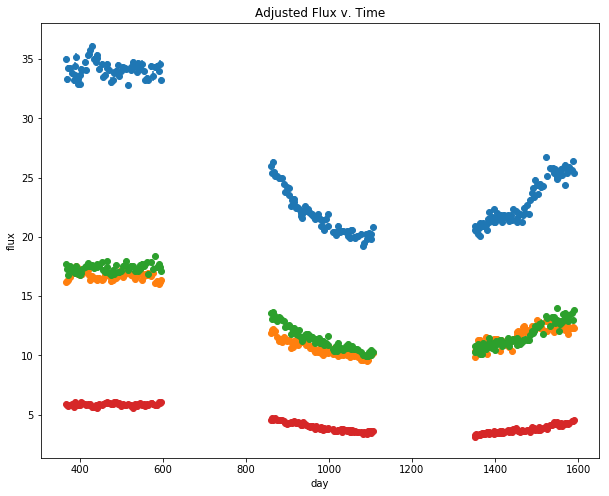

In [26]:
# plot them
plt.figure(figsize = (10,8))
plotData(data1['day'], data1['ffa'], data1['ffb'], data1['ffc'], data1['ffd'], data1['fferra'], data1['fferrb'], data1['fferrc'], data1['fferrd'])
plotData(data2['day'], data2['ffa'], data2['ffb'], data2['ffc'], data2['ffd'], data2['fferra'], data2['fferrb'], data2['fferrc'], data2['fferrd'])
plotData(data3['day'], data3['ffa'], data3['ffb'], data3['ffc'], data3['ffd'], data3['fferra'], data3['fferrb'], data3['fferrc'], data3['fferrd'])

In [15]:
# concatenate data
bigdata = np.concatenate((data1, data2, data3))

In [16]:
# find mean of big set for normalization
bigAverageA = np.mean(bigdata['ffa'])
bigAverageB = np.mean(bigdata['ffb'])
bigAverageC = np.mean(bigdata['ffc'])
bigAverageD = np.mean(bigdata['ffd'])
normalConstants = np.asarray((bigAverageA, bigAverageB, bigAverageC, bigAverageD))

In [17]:
# normalize sets separately using big constant
na1, nb1, nc1, nd1, nerra1, nerrb1, nerrc1, nerrd1 = normalize(data1['ffa'], data1['ffb'], data1['ffc'], data1['ffd'], data1['fferra'], data1['fferrb'], data1['fferrc'], data1['fferrd'], normalConstants)
na2, nb2, nc2, nd2, nerra2, nerrb2, nerrc2, nerrd2 = normalize(data2['ffa'], data2['ffb'], data2['ffc'], data2['ffd'], data2['fferra'], data2['fferrb'], data2['fferrc'], data2['fferrd'], normalConstants)
na3, nb3, nc3, nd3, nerra3, nerrb3, nerrc3, nerrd3 = normalize(data3['ffa'], data3['ffb'], data3['ffc'], data3['ffd'], data3['fferra'], data3['fferrb'], data3['fferrc'], data3['fferrd'], normalConstants)

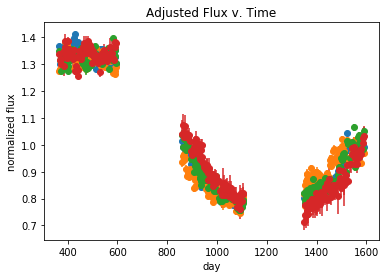

In [18]:
plotData(data1['day'], na1, nb1, nc1, nd1, nerra1, nerrb1, nerrc1, nerrd1)
plotData(data2['day'], na2, nb2, nc2, nd2, nerra2, nerrb2, nerrc2, nerrd2)
plotData(data3['day'], na3, nb3, nc3, nd3, nerra3, nerrb3, nerrc3, nerrd3)

In [19]:
# find mean of x interpolation differences for big set
newX1, newX2, newX3, dxBig = interpolateXbig(data1, data2, data3, 'day')

enter a smoothing size: 9


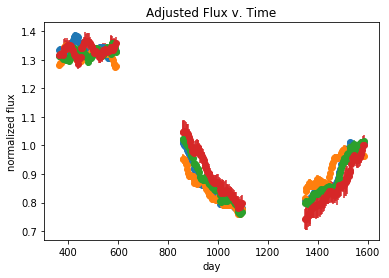

In [20]:
# interpolate data
# newX1, dx1= interpolateX(data1, 'day')
smoothSize = input('enter a smoothing size: ')
newa1, newb1, newc1, newd1, newerra1, newerrb1, newerrc1, newerrd1, remainingNewX1 = interpolateY(data1['day'], newX1, na1, nb1, nc1, nd1, nerra1, nerrb1, nerrc1, nerrd1, smoothSize)
# print(newa, newb, newc, newd, newerra, newerrb, newerrc, newerrd)
plotData(newX1, newa1, newb1, newc1, newd1, newerra1, newerrb1, newerrc1, newerrd1)

# newX2, dx2= interpolateX(data2, 'day')
newa2, newb2, newc2, newd2, newerra2, newerrb2, newerrc2, newerrd2, remainingNewX2 = interpolateY(data2['day'], newX2, na2, nb2, nc2, nd2, nerra2, nerrb2, nerrc2, nerrd2, smoothSize)
# print(newa, newb, newc, newd, newerra, newerrb, newerrc, newerrd)
plotData(newX2, newa2, newb2, newc2, newd2, newerra2, newerrb2, newerrc2, newerrd2)

# newX3, dx3= interpolateX(data3, 'day')
newa3, newb3, newc3, newd3, newerra3, newerrb3, newerrc3, newerrd3, remainingNewX3 = interpolateY(data3['day'], newX3, na3, nb3, nc3, nd3, nerra3, nerrb3, nerrc3, nerrd3, smoothSize)
# print(newa, newb, newc, newd, newerra, newerrb, newerrc, newerrd)
plotData(newX3, newa3, newb3, newc3, newd3, newerra3, newerrb3, newerrc3, newerrd3)

In [21]:
chiRange = input("Input a range of shifts: ")
chia1, chib1, chic1 = shiftArray(newb1, newa1, newc1, newd1, newerrb1, newerra1, newerrc1, newerrd1, chiRange)
chia2, chib2, chic2 = shiftArray(newb2, newa2, newc2, newd2, newerrb2, newerra2, newerrc2, newerrd2, chiRange)
chia3, chib3, chic3 = shiftArray(newb3, newa3, newc3, newd3, newerrb3, newerra3, newerrc3, newerrd3, chiRange)

Input a range of shifts: 30


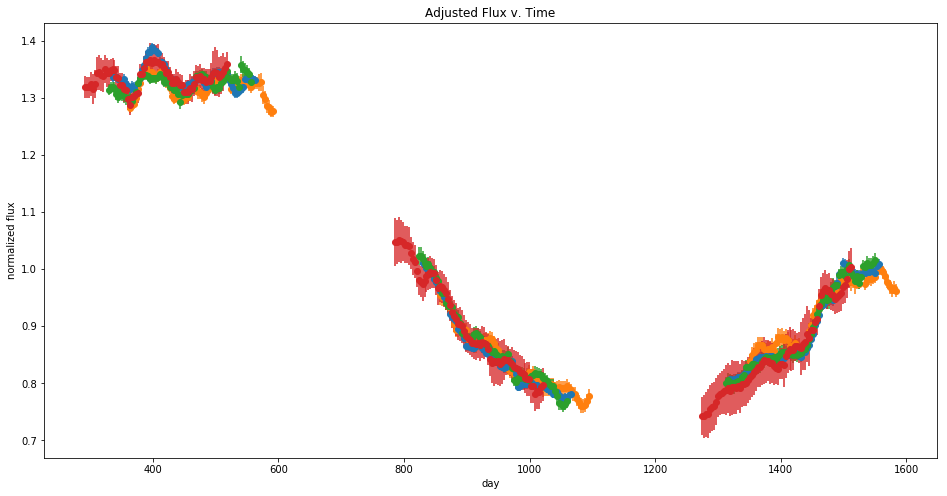

In [22]:
# main 5: plot a single shifted result
plt.figure(figsize = (16,8))
bigChia = chia1 + chia2 + chia3
bigChib = chib1 + chib2 + chib3
bigChic = chic1 + chic2 + chic3
plotShiftedData(remainingNewX1, dxBig, newb1, newa1, newc1, newd1, bigChia, bigChib, bigChic, newerrb1, newerra1, newerrc1, newerrd1)
plotShiftedData(remainingNewX2, dxBig, newb2, newa2, newc2, newd2, bigChia, bigChib, bigChic, newerrb2, newerra2, newerrc2, newerrd2)
plotShiftedData(remainingNewX3, dxBig, newb3, newa3, newc3, newd3, bigChia, bigChib, bigChic, newerrb3, newerra3, newerrc3, newerrd3)

In [25]:
"""
print(np.argmin(chia1)*dx1)
print(np.argmin(chib1)*dx1)
print(np.argmin(chic1)*dx1)
print
print(np.argmin(chia2)*dx2)
print(np.argmin(chib2)*dx2)
print(np.argmin(chic2)*dx2)
print
print(np.argmin(chia3)*dx3)
print(np.argmin(chib3)*dx3)
print(np.argmin(chic3)*dx3)
"""

'\nprint(np.argmin(chia1)*dx1)\nprint(np.argmin(chib1)*dx1)\nprint(np.argmin(chic1)*dx1)\nprint\nprint(np.argmin(chia2)*dx2)\nprint(np.argmin(chib2)*dx2)\nprint(np.argmin(chic2)*dx2)\nprint\nprint(np.argmin(chia3)*dx3)\nprint(np.argmin(chib3)*dx3)\nprint(np.argmin(chic3)*dx3)\n'

28.369154595404602
34.67341117216118
72.49895063270066


# Results

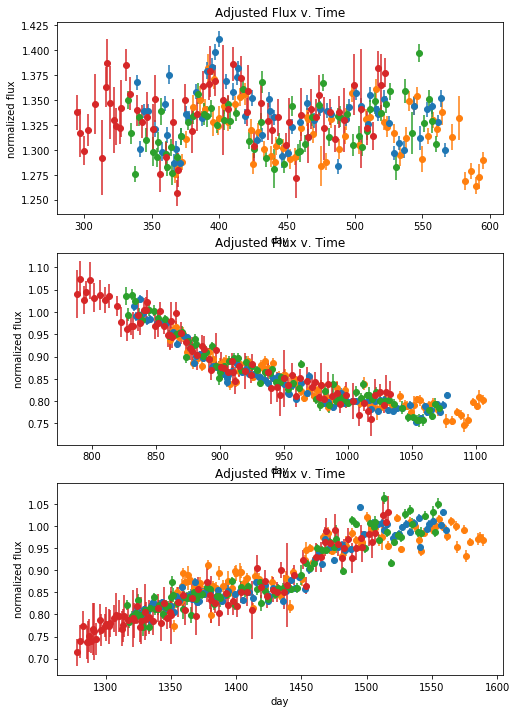

In [23]:
# plot individual shifted raw data sets
plt.figure(figsize = (8,12))
plt.subplot(3, 1, 1)
plotShiftedData(data1['day'], dxBig, nb1, na1, nc1, nd1, bigChia, bigChib, bigChic, nerrb1, nerra1, nerrc1, nerrd1)
plt.subplot(3, 1, 3)
plotShiftedData(data2['day'], dxBig, nb2, na2, nc2, nd2, bigChia, bigChib, bigChic, nerrb2, nerra2, nerrc2, nerrd2)
plt.subplot(3, 1, 2)
plotShiftedData(data3['day'], dxBig, nb3, na3, nc3, nd3, bigChia, bigChib, bigChic, nerrb3, nerra3, nerrc3, nerrd3)

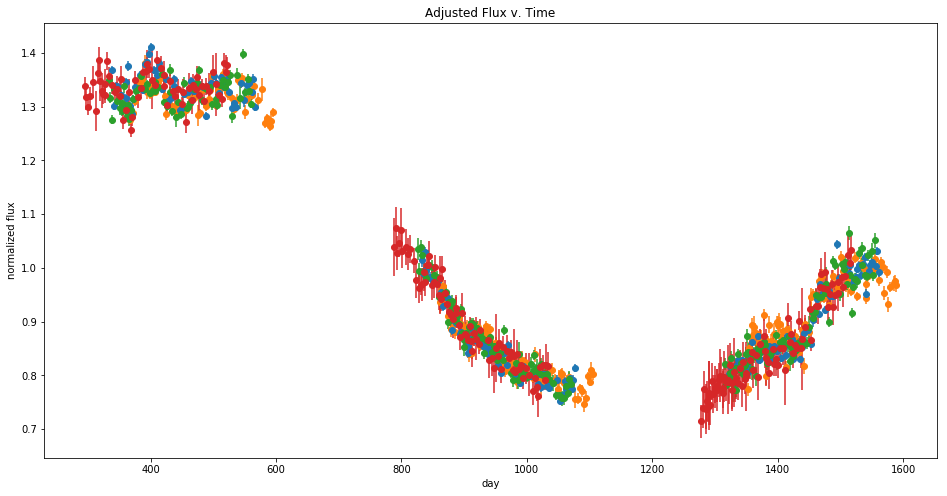

In [65]:
# plot shifted raw data
plt.figure(figsize = (16,8))
plotShiftedData(data1['day'], dxBig, nb1, na1, nc1, nd1, bigChia, bigChib, bigChic, nerrb1, nerra1, nerrc1, nerrd1)
plotShiftedData(data2['day'], dxBig, nb2, na2, nc2, nd2, bigChia, bigChib, bigChic, nerrb2, nerra2, nerrc2, nerrd2)
plotShiftedData(data3['day'], dxBig, nb3, na3, nc3, nd3, bigChia, bigChib, bigChic, nerrb3, nerra3, nerrc3, nerrd3)

In [88]:
# divide chis against model and estimate Hubble's constant 
shifta = np.argmin(bigChia)*dxBig
shiftb = np.argmin(bigChib)*dxBig
shiftc = np.argmin(bigChic)*dxBig

tObs = np.asarray([shifta, shiftb, shiftc])
tMod = np.asarray([24.6, 27.5, 58.1])
tComp = tMod/tObs
hubbelAverage = np.mean(tComp)
print(tComp)
print(hubbelAverage)
print(np.std(tComp))
print
print(np.argmin(bigChia)*dxBig)
print(np.argmin(bigChib)*dxBig)
print(np.argmin(bigChic)*dxBig)

[0.86713899 0.79311493 0.80139091]
0.8205482751091907
0.03311740578826883

28.369154595404602
34.67341117216118
72.49895063270066


In [86]:
# Gravitational lens: B1608+656